In [1]:
import os,cv2
import numpy as np
from keras.utils import np_utils

In [2]:
data_path="C:/Users/PARCHU/Downloads/cardiomegaly/train"

In [3]:
categories = os.listdir(data_path)

In [4]:
labels = [i for i in range(len(categories))]

In [5]:
label_dict = dict(zip(categories,labels))

In [6]:
print(categories)
print(labels)
print(label_dict)

['false', 'true']
[0, 1]
{'false': 0, 'true': 1}


In [22]:
image_size = 100
data = []
target = []
for category in categories:
    folder_path = os.path.join(data_path,category)
    image_names = os.listdir(folder_path)
    for image_name in image_names:
        image_path = os.path.join(folder_path,image_name)
        img = cv2.imread(image_path)

        try:
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resize = cv2.resize(gray,(image_size,image_size))
            data.append(resize)
            target.append(label_dict[category])

        except Exception as e:
            print("Exception ",e)

In [23]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],image_size,image_size,1))
target=np.array(target)

In [24]:
new_target=np_utils.to_categorical(target)

In [25]:
np.save('data.npy', data)

In [26]:
np.save('target.npy', target)

In [27]:
import numpy as np
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.python.keras.layers import Conv2D,MaxPooling2D
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.optimizers import TFOptimizer
from tensorflow.python.keras.models import load_model
data=np.load('data.npy')
target=np.load('target.npy')

In [28]:
model=Sequential()
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [30]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/5
89/89 [==============================] - 215s 2s/step - loss: 0.7016 - accuracy: 0.5377 - val_loss: 0.6642 - val_accuracy: 0.6141
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/5
89/89 [==============================] - 183s 2s/step - loss: 0.6431 - accuracy: 0.6222 - val_loss: 0.6214 - val_accuracy: 0.6451
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/5
89/89 [==============================] - 182s 2s/step - loss: 0.6111 - accuracy: 0.6658 - val_loss: 0.6256 - val_accuracy: 0.6437
Epoch 4/5
89/89 [==============================] - 180s 2s/step - loss: 0.6094 - accuracy: 0.6528 - val_loss: 0.5882 - val_accuracy: 0.6803
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/5
89/89 [==============================] - 185s 2s/step - loss: 0.5826 - accuracy: 0.6838 - val_loss: 0.5838 - val_accuracy: 0.6930
INFO:tensorflow:Assets written to: model-005.model\assets


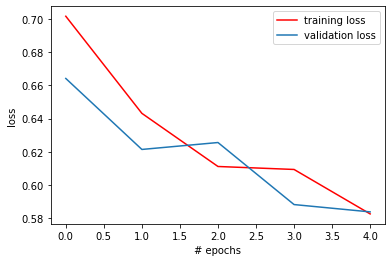

In [31]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

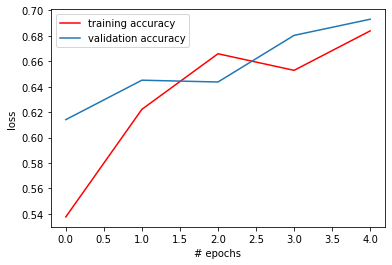

In [32]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [33]:
from tensorflow.python.keras.models import load_model
import os
import cv2
import numpy as np

In [ ]:
model = load_model('model-005.model')
source='C:/Users/PARCHU/Downloads/cardiomegaly/train/true/2184'
labels_dict={0:'FALSE',1:'TRUE'}


In [ ]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_clsfr.detectMultiScale(
        gray,
        scaleFactor=1.1,
        
    )   

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('Face Detection',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()